<a href="https://colab.research.google.com/github/hardsoft-maker/Theoretical_Mechanics/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
!pip3 install matplotlib numpy PyQt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 7.8 MB/s eta 0:00:00


<ipython-input-3-e8916e5d0fc6>:92: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pointx.set_data(40,-ybox-30)
<ipython-input-3-e8916e5d0fc6>:97: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
<ipython-input-3-e8916e5d0fc6>:100: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point1.set_data(x1,y1)
<ipython-input-3-e8916e5d0fc6>:101: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point2.set_data(x2,y2)


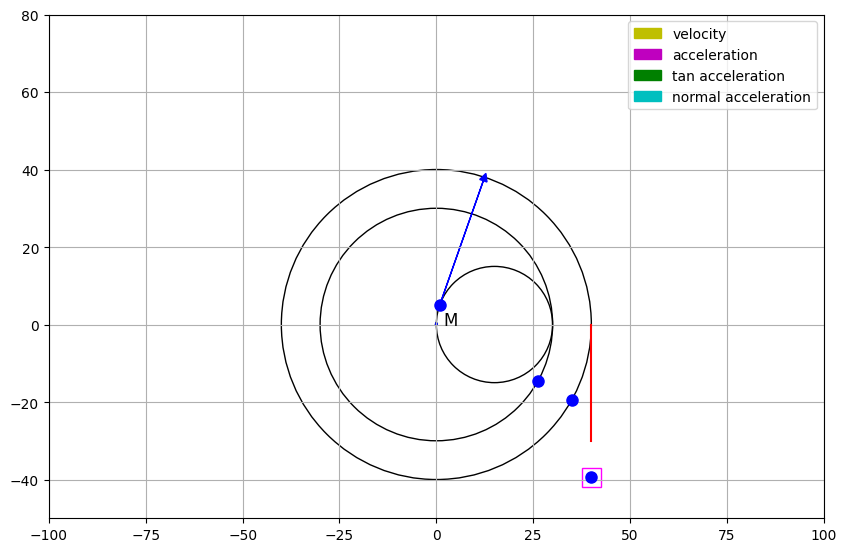

In [ ]:
from dataclasses import dataclass
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import math
FPS = 120  # increase to make animation slower
phi_start = 0.0
phi_end = 2 * np.pi
def fx1(t):
  return 40
def fy1(t):
  return 3+80*(t**2)
def phi(i):
    return phi_start + i / FPS
def t(i):
  return t_start +i/FPS
@dataclass
class pointsTracer:
  velocity: np.array
  acceleration: np.array
  x: float
  y: float
  t: float
  @property
  def acct(self):
        # tangential acceleration is aligned with velocity vector
        acct = np.dot(self.velocity,self.acceleration / np.linalg.norm(self.velocity))
        return acct * self.velocity / np.linalg.norm(self.velocity)
  @property
  def accn(self):
        return self.acceleration - self.acct
tracer:List[pointsTracer]=[]
fig,ax=plt.subplots(figsize=(10,10))
point, = ax.plot([], [], 'bo', markersize=8)
point1, = ax.plot([], [], 'bo', markersize=8)
point2, = ax.plot([], [], 'bo', markersize=8)
pointx, = ax.plot([], [], 'bo', markersize=8)

xx=[40,40]
yy=[0,-30]
plt.plot(xx, yy,color='red')

def init():
  ax.set(xlim=(-100, 100), ylim=(-50, 80))
  ax.set_aspect("equal")
  ax.grid()
  global arrow_vector
  global accn_vec
  point.set_data([], [])
  point1.set_data([], [])
  point2.set_data([], [])
  pointx.set_data([], [])
  arrow_vector = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="b", label="motion vector")
  accn_vec = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="b", label="motion vector")
  return [point,arrow_vector]

label = ax.text(0, 0, '', ha='left', va='center',fontsize=12)
circle1 = patches.Circle((0, 0), 40, edgecolor='black', facecolor='none')
circle2 = patches.Circle((0, 0), 30, edgecolor='black', facecolor='none')
circle3 = patches.Circle((15, 0), 15, edgecolor='black', facecolor='none')
box= patches.Rectangle((40,-30),5,5,edgecolor='magenta',facecolor='none')

velocity = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="b",label="velocity")
acceleration = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="m",label="acceleration")
acct = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="g",label="tan acceleration")
accn = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="c",label="normal acceleration")

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(box)
ax.legend()
def animate(frame):
    global arrow_vector
    phiM=frame*frame*4*np.pi/3
    phi2=frame*frame*2*np.pi
    phi1=frame*frame*2*np.pi
    ybox=3+80*(frame**2)
    x=15*np.cos(phiM+np.pi)+15
    y=15*np.sin(phiM)
    x1=30*np.cos(phi2)
    y1=-30*np.sin(phi2)
    x2=40*np.cos(phi1)
    y2=-40*np.sin(phi1)
    circle_center = (15, 0)
    circle_radius = 15
    tangent_angle = np.arctan2(y - circle_center[1], x - circle_center[0])
    arrow_length = frame * 120
    dx = arrow_length * np.cos(tangent_angle)
    dy = arrow_length * np.sin(tangent_angle)
    pointx.set_data(40,-ybox-30)

    if arrow_vector is not None:
        arrow_vector.remove()
    if accn_vec is not None:
      accn_vec.remove()
    #accn_vec = ax.arrow(x, y, dy, -dx, head_width=2, head_length=2, color="b", label="accn vector")
    arrow_vector = ax.arrow(x, y, dy, -dx, head_width=2, head_length=2, color="b", label="motion vector")
    point.set_data(x, y)
    label.set_position((x+1,y-1))
    label.set_text('\nM')
    point1.set_data(x1,y1)
    point2.set_data(x2,y2)
    box.set_x(37.5)
    box.set_y(-32.5-ybox)
    return circle1,
animation=FuncAnimation(fig,animate,frames=np.arange(0,np.sqrt(1/12),np.sqrt(1/12)/60),init_func=init,blit=True,repeat=False)
animation.save('motiontest.gif')
plt.draw()
plt.show()

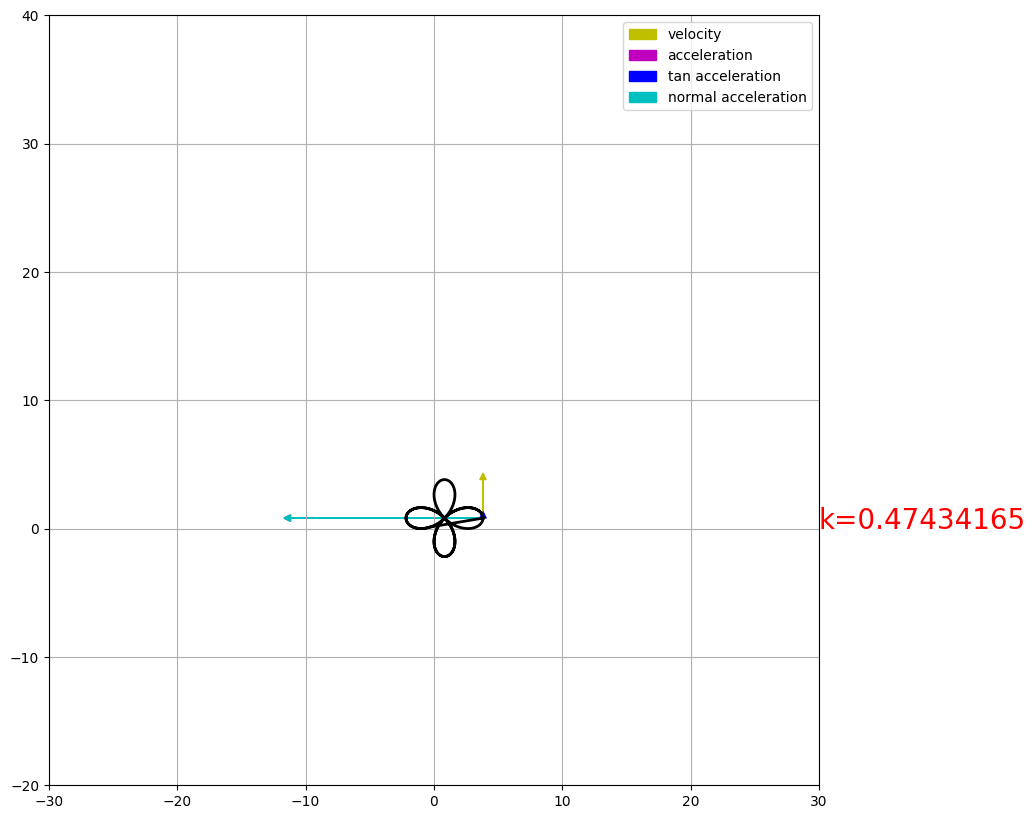

In [3]:
from dataclasses import dataclass
from typing import List
from matplotlib.animation import FuncAnimation
import math
FPS = 60
t_start = 0.0
t_end = 10.0
frames = int((t_end - t_start) * FPS)
def fx(t):
  return 3*math.cos(2*t)*math.cos(t)+0.82
def fy(t):
  return 3*math.cos(2*t)*math.sin(t)+0.82
def t(i):
    return t_start + i / FPS
@dataclass
class pointsTracer:
  velocity: np.array
  acceleration: np.array
  x: float
  y: float
  t: float
  @property
  def acct(self):
        # tangential acceleration is aligned with velocity vector
        acct = np.dot(self.velocity,self.acceleration / np.linalg.norm(self.velocity))
        return acct * self.velocity / np.linalg.norm(self.velocity)
  @property
  def accn(self):
        return self.acceleration - self.acct
  @property
  def Kcurvature(self):
        return np.linalg.norm(self.acceleration)/(np.sqrt(1+self.velocity@self.velocity))**3


tracer: List[pointsTracer]=[]

fig, ax = plt.subplots(figsize=(10,10))
ax.set(xlim=(-30,30), ylim=(-20,40))
ax.set_aspect("equal")
ax.grid()

line = ax.plot([],[],color="k",lw=2)[0]
velocity = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="y",label="velocity")
acceleration = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="m",label="acceleration")
acct = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="b",label="tan acceleration")
accn = ax.arrow(0,0,0,0, head_width=0.5,head_length=0.5,color="c",label="normal acceleration")
ktitle = ax.text(30,0,"",color="r",fontsize=20)
ax.legend()
def animate(i):
  ti=t(i)
  tracer.append(
      pointsTracer(
          x=fx(ti),
          y=fy(ti),
          t=ti,
          velocity=np.array([(-6)*math.sin(2*ti)*math.cos(ti)-3*math.sin(ti)*math.cos(2*ti),18*(math.cos(ti)**3)-15*math.cos(ti),0]),
          acceleration=np.array([-12*math.cos(2*ti)*math.cos(ti)+6*math.sin(2*ti)*math.sin(ti)+ 15*math.cos(ti)-18*(math.cos(ti)**3),-54*(math.cos(ti)**2)*math.sin(ti)+15*math.sin(ti),0]),
          )
  )
  last = tracer[-1]
  line.set_xdata([p.x for p in tracer])
  line.set_ydata([p.y for p in tracer])
  velocity.set_data(x=last.x,dx=last.velocity[0],y=last.y,dy=last.velocity[1])
  acceleration.set_data(x=last.x, dx=last.acceleration[0],y=last.y,dy=last.acceleration[1])
  acct.set_data(x=last.x, dx=last.acct[0], y=last.y, dy=last.acct[1])
  accn.set_data(x=last.x,dx=last.accn[0],y=last.y,dy=last.accn[1])
  ktitle.set_text(f"k={last.Kcurvature:.8f}")

anim= FuncAnimation(fig,animate,interval=1,frames=frames)
anim.save("animation_task1.gif")
plt.draw()
plt.show()


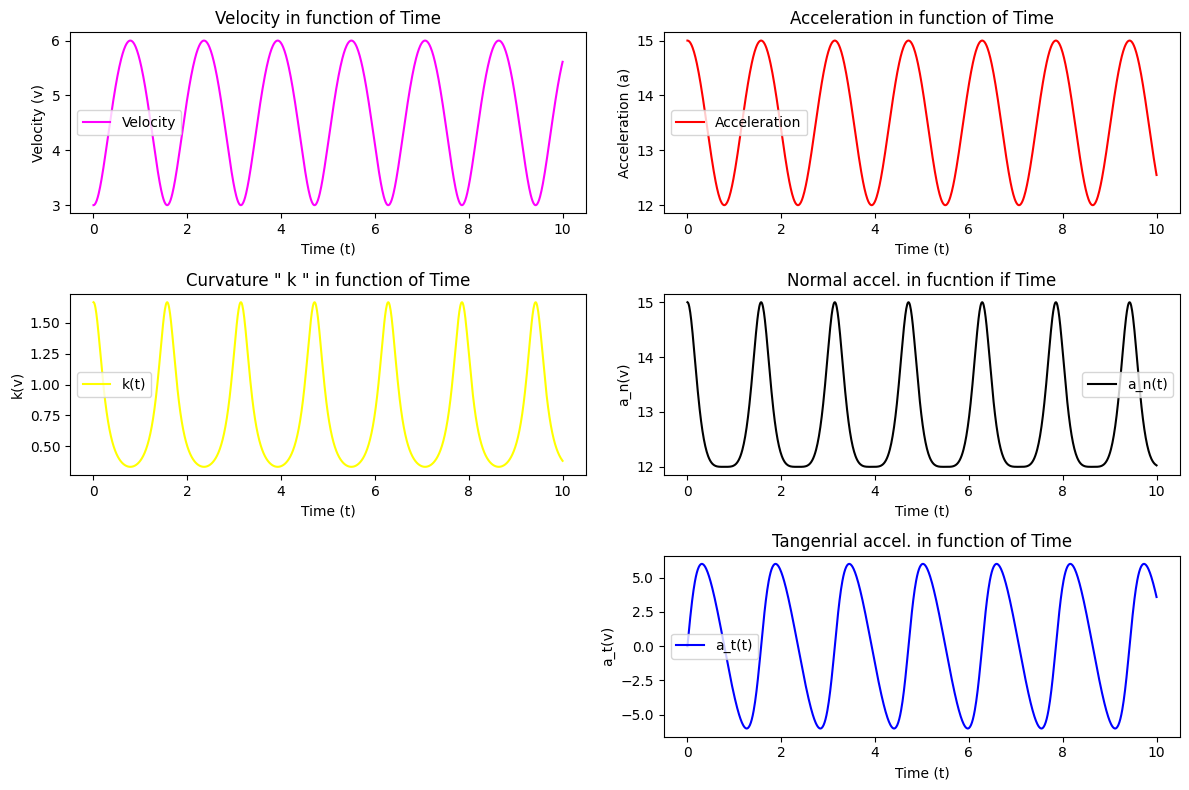

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the time values
t_values = np.linspace(0, 10, 1000)  # 100 points from 0 to 10

# Replace these functions with your actual functions
def acceleration_function(t):
    return 3 * np.sqrt(9*np.cos(2*t)**2 + 16)

def velocity_function(t):
    return 3 * np.sqrt(1 + 3*np.sin(2*t)**2)

def normal_acceleration(t):
    return (9*np.sin(2*t)**2 + 15)/(np.sqrt(1 + 3*np.sin(2*t)**2))

def tangential_acceleration(t):
    return (9*np.sin(4*t))/(np.sqrt(1+3*np.sin(2*t)**2))

def curvature(t):
    return (3*np.sin(2*t)**2 + 5)/(3*((1+3*np.sin(2*t)**2)**(3/2)))

# Calculate acceleration and velocity values
acceleration_values = acceleration_function(t_values)
velocity_values = velocity_function(t_values)
tangential_acceleration_values = tangential_acceleration(t_values)
normal_acceleration_values = normal_acceleration(t_values)
curvature_values= curvature(t_values)

# Create a 3x2 grid for the plots
plt.figure(figsize=(12, 8))

# Plot 1: Acceleration vs Time
plt.subplot(3, 2, 2)
plt.plot(t_values, acceleration_values, label='Acceleration', color ='red')
plt.title('Acceleration in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a)')
plt.legend()

# Plot 2: Velocity vs Time
plt.subplot(3, 2, 1)
plt.plot(t_values, velocity_values, label='Velocity', color='magenta')
plt.title('Velocity in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.legend()

# Plot 3: Tangenrial accel. vs Time
plt.subplot(3, 2, 6)
plt.plot(t_values, tangential_acceleration_values, label='a_t(t)', color='blue')
plt.title('Tangenrial accel. in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('a_t(v)')
plt.legend()

# Plot 4: Normal accel. vs Time
plt.subplot(3, 2, 4)
plt.plot(t_values, normal_acceleration_values, label='a_n(t)', color='black')
plt.title('Normal accel. in fucntion if Time')
plt.xlabel('Time (t)')
plt.ylabel('a_n(v)')
plt.legend()


# Plot 5: Curvature vs Time
plt.subplot(3, 2, 3)
plt.plot(t_values, curvature_values, label='k(t)', color='yellow')
plt.title('Curvature " k " in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('k(v)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the time values
t_values = np.linspace(0, np.sqrt(1/12), 1000)  # 100 points from 0 to 10

# Replace these functions with your actual functions
def velocity_M(t):
    return 120*t

def total_acceleration_of_M(t):
    return np.sqrt(normal_acceleration_of_M(t)**2 + tangential_acceleration_of_M(t)**2)

def normal_acceleration_of_M(t):
    return 960*t**2

def tangential_acceleration_of_M(t):
    result = np.ones((len(t),)) * 120
    return result


# Calculate acceleration and velocity values
velocity_M_values = velocity_M(t_values)
tangential_acceleration_values_of_M = tangential_acceleration_of_M(t_values)
normal_acceleration_values_of_M = normal_acceleration_of_M(t_values)
total_acceleration_values_of_M = total_acceleration_of_M(t_values)


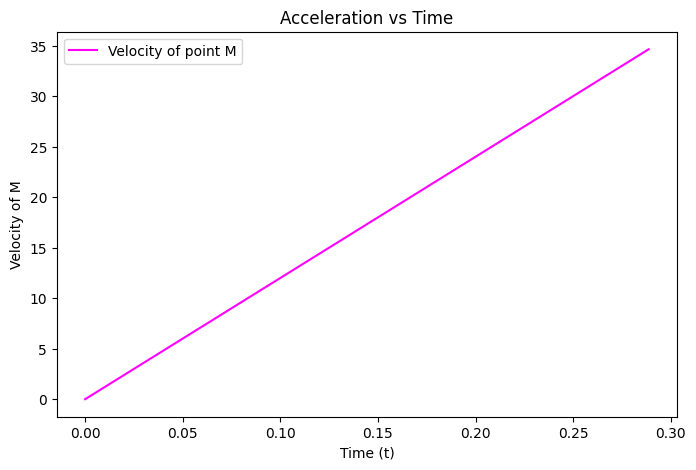

In [ ]:
# Create a 3x2 grid for the plots
plt.figure(figsize=(8, 5))

# Plot 1: Velocity of M vs Time
plt.plot(t_values, velocity_M_values, label='Velocity of point M', color ='magenta')
plt.title('Acceleration vs Time')
plt.xlabel('Time (t)')
plt.ylabel('Velocity of M')
plt.legend()

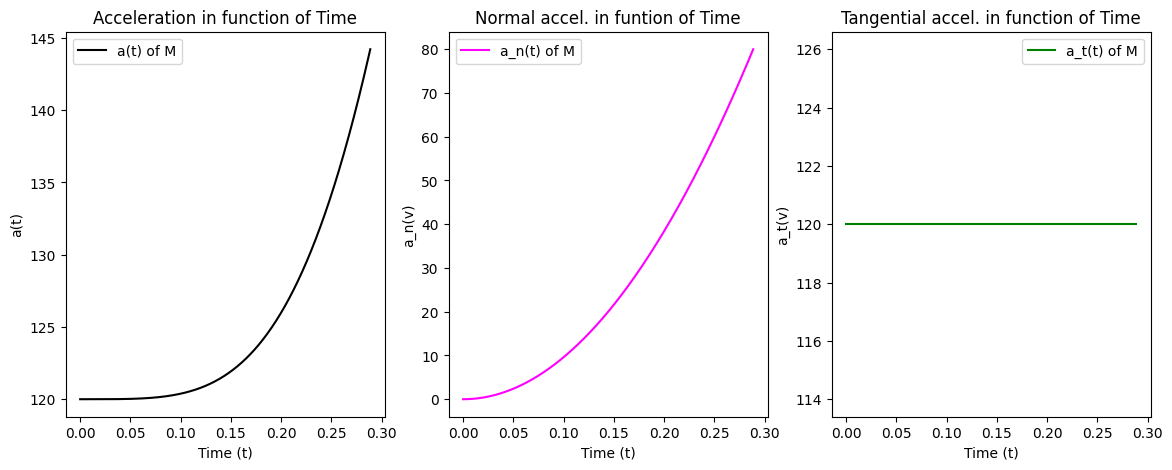

In [ ]:
# Create a 3x2 grid for the plots
plt.figure(figsize=(14, 5))

# Plot 1: Acceleration vs Time
plt.subplot(1, 3, 1)
plt.plot(t_values, total_acceleration_values_of_M, label='a(t) of M',color='black')
plt.title('Acceleration in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('a(t)')
plt.legend()

# Plot 2: Normal accel. vs Time
plt.subplot(1, 3, 2)
plt.plot(t_values, normal_acceleration_values_of_M, label='a_n(t) of M', color='magenta')
plt.title('Normal accel. in funtion of Time')
plt.xlabel('Time (t)')
plt.ylabel('a_n(v)')
plt.legend()

# Plot 3: Tangenrial accel. vs Time
plt.subplot(1, 3, 3)
plt.plot(t_values, tangential_acceleration_values_of_M, label='a_t(t) of M', color='green')
plt.title('Tangential accel. in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('a_t(v)')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

t_values = np.linspace(0, np.sqrt(1/12), 1000)
def w_2(t):
    return 4*t

def w_m(t):
    return 8*t

# Calculate angular velocities
w_2_values = w_2(t_values)
w_m_values = w_m(t_values)

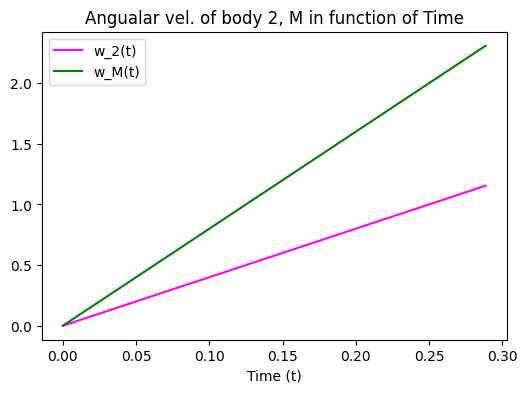

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(t_values, w_2_values, label='w_2(t)',color='magenta')
plt.plot(t_values, w_m_values, label='w_M(t)',color='green')
plt.title('Angualar vel. of body 2, M in function of Time')
plt.xlabel('Time (t)')
plt.legend()


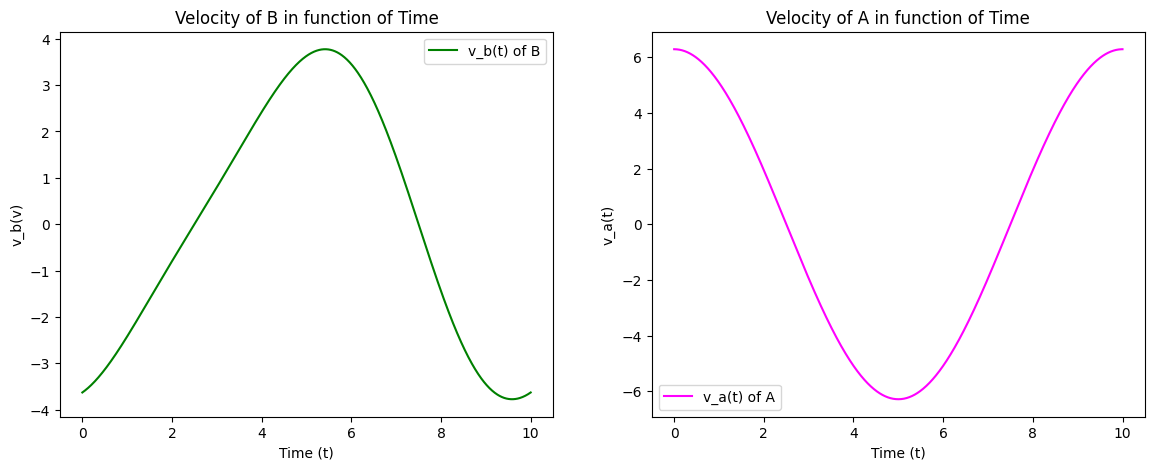

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

t_values = np.linspace(0, 10, 1000)
def velocity_a(t):
    return 2*np.pi*np.cos(np.pi*t/5)

def velocity_b(t):
    num = -18 * np.pi * np.cos(np.pi * t / 5) + 4 * np.pi * np.sin(2 * np.pi * t / 5)
    den_sq = 243 - 72 * np.sin(np.pi * t / 5) - 16 * np.sin(np.pi * t / 5)**2
    return num / np.sqrt(den_sq)
velocity_a_values = velocity_a(t_values)
velocity_b_values = velocity_b(t_values)

# Create a 3x2 grid for the plots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(t_values, velocity_a_values, label='v_a(t) of A',color='magenta')
plt.title('Velocity of A in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('v_a(t)')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(t_values, velocity_b_values, label='v_b(t) of B', color='green')
plt.title('Velocity of B in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('v_b(v)')
plt.legend()


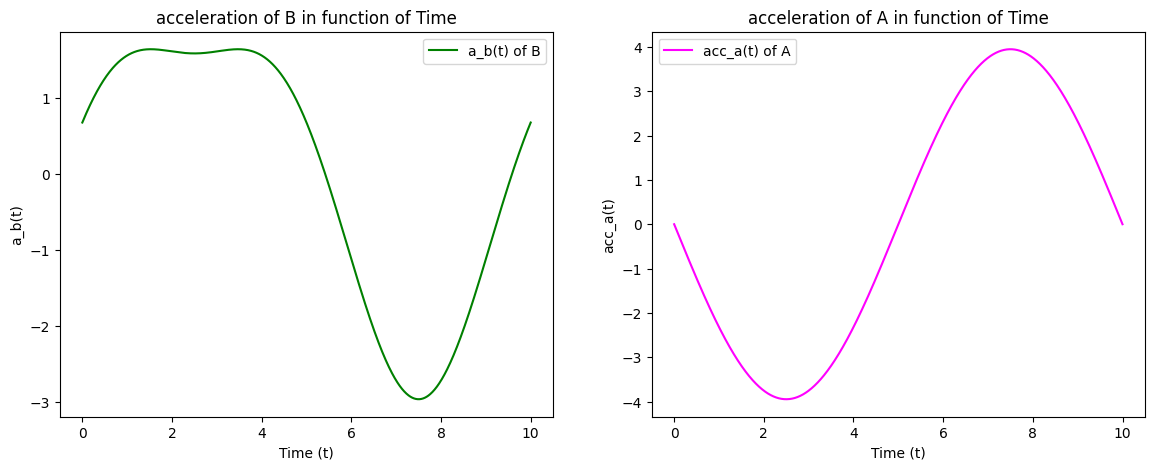

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import sympy as sp

t_values = np.linspace(0, 10, 1000)

def fb(t):
  num = -18 * np.pi * np.cos(np.pi * t / 5) + 4 * np.pi * np.sin(2 * np.pi * t / 5)
  den_sq = 243 - 72 * np.sin(np.pi * t / 5) - 16 * np.sin(np.pi * t / 5)**2
  return num / np.sqrt(den_sq)
def fa(t):
  return 2*np.pi*np.cos(np.pi*t/5)
dt = 1e-8
fa_prime = (fa(t_values + dt) - fa(t_values - dt)) / (2 * dt)
fb_prime = (fb(t_values + dt) - fb(t_values - dt)) / (2 * dt)

# Create a 3x2 grid for the plots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(t_values, fa_prime, label='acc_a(t) of A',color='magenta')
plt.title('acceleration of A in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('acc_a(t)')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(t_values, fb_prime, label='a_b(t) of B', color='green')
plt.title('acceleration of B in function of Time')
plt.xlabel('Time (t)')
plt.ylabel('a_b(t)')
plt.legend()

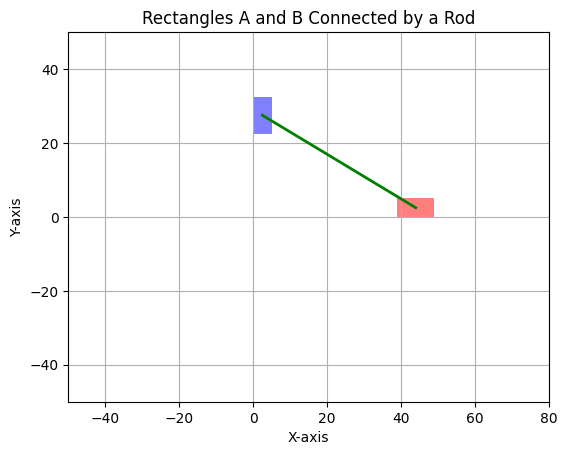

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to update the position of the rectangles and the rod
def update(num, rectA, rectB, line):
    # Update the position of rectangle A along the y-axis
    y_a = 22.5 + 10 * np.sin(np.pi*num/5)
    rectA.set_y(y_a)

    # Update the position of rectangle B along the x-axis
    rectB.set_x(np.sqrt(45**2 - y_a**2))

    # Update the position of the rod
    line.set_data([rectA.get_x() + 2.5, rectB.get_x() + 5], [rectA.get_y() + 5, rectB.get_y() + 2.5])

    return rectA, rectB, line

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-50, 80)
ax.set_ylim(-50, 50)

# Create rectangle A
rectA = plt.Rectangle((0, 22.5), 5, 10, fc='blue', alpha=0.5)

# Create rectangle B
rectB = plt.Rectangle((np.sqrt(45**2-22.5**2), 0), 10, 5, fc='red', alpha=0.5)

# Create the rod
line, = ax.plot([], [], 'green', lw = 2)

# Add rectangles and rod to the plot
ax.add_patch(rectA)
ax.add_patch(rectB)

# Set up the animation
# ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 90, 1),
#                               interval=50, blit=True, fargs=(rectA, rectB, line))

# ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 199, 200),
#                               interval=50, blit=True, fargs=(rectA, rectB, line))\
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 10, 101),
                              interval=50, blit=True, fargs=(rectA, rectB, line))

plt.title('Rectangles A and B Connected by a Rod')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
ani.save("t3_anim.gif")
plt.show()
